In [2]:
import janitor
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
house_data = pd.read_csv('house_data.csv').clean_names()

In [4]:
pd.set_option('max_columns', 500)

In [5]:
house_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [6]:
# Verifying information about dataset
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


In [7]:
# Verifying null cells
house_data.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [8]:
# Verifying qualitative features(condition)
house_data['condition'].value_counts()

3    14031
4     5679
5     1701
2      172
1       30
Name: condition, dtype: int64

In [9]:
# Converting numeric feature into qualitative feature
house_data['condition'] = house_data['condition'].replace(to_replace= [1, 2, 3, 4, 5], 
                                                          value=['Terrible', 'Bad', 'Avarage', 'Good', 'Excelent'])

In [10]:
house_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,Avarage,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,Avarage,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,Avarage,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,Excelent,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,Avarage,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [11]:
# Creating Dummy for feature(Condition)
house_data = pd.get_dummies(house_data, columns=['condition'], drop_first=True)

In [12]:
house_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,condition_Bad,condition_Excelent,condition_Good,condition_Terrible
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,0,0,0,0
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,0,0,0,0
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,0,0,0,0
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,0,1,0,0
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,0,0,0,0


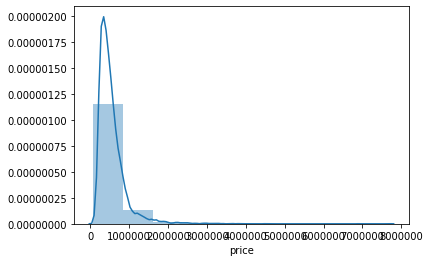

In [13]:
# Verifying Price distribution
sns.distplot(house_data['price'], bins=10)

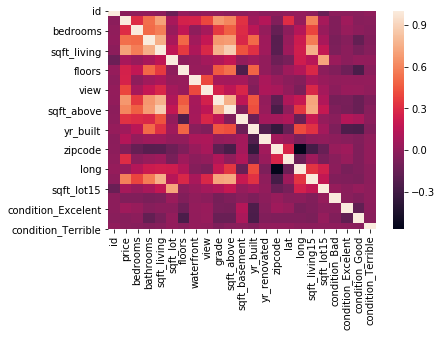

In [14]:
# Creating heatmap
sns.heatmap(house_data.corr())

In [15]:
# Importing Linear Regression library
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [16]:
# Sorting database into train and test
X_train, X_test, y_train, y_test = train_test_split(house_data.drop(['id', 'date', 'price'], axis=1),
                                                   house_data['price'], test_size=0.3, random_state=9)

In [17]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((15129, 21), (6484, 21), (15129,), (6484,))

In [18]:
lm = LinearRegression()

In [19]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [20]:
# Linear Coeficient
lm.coef_

array([-3.28792236e+04,  4.23820290e+04,  1.03797537e+02,  1.20438172e-01,
        5.02451191e+03,  5.62468585e+05,  5.48497284e+04,  9.63334995e+04,
        6.82349720e+01,  3.55625645e+01, -2.59555012e+03,  1.84539157e+01,
       -6.05176018e+02,  6.03385657e+05, -2.26014673e+05,  2.97342569e+01,
       -3.75770271e-01,  2.86910076e+04,  6.73729292e+04,  2.60780308e+04,
       -2.54515246e+04])

In [21]:
# Intercept
lm.intercept_

7531521.372129292

In [22]:
# Train Score
lm.score(X_train, y_train)

0.6940320796501501

In [23]:
# Prediction of X_test
y_pred = lm.predict(X_test)

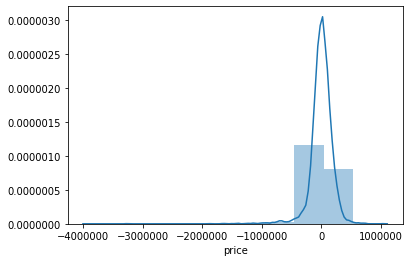

In [24]:
# Distribution difference (Prediction - real)
sns.distplot(y_pred - y_test, bins=10)

Text(0, 0.5, 'Observed prices')

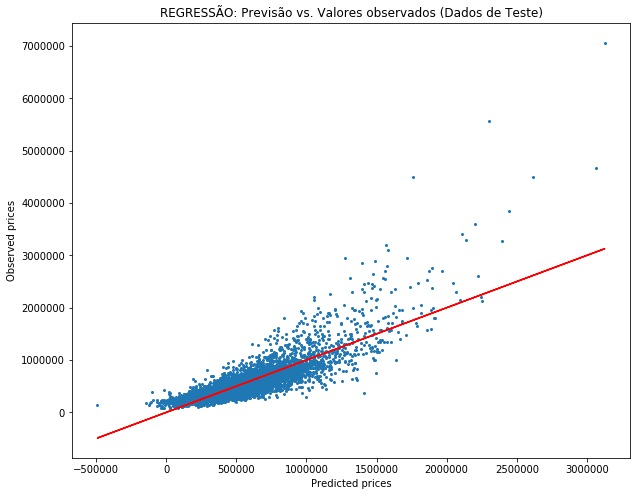

In [29]:
fig,ax = plt.subplots(figsize=(10,8))
ax.scatter(y_pred, y_test,s=4)
ax.plot(y_pred,y_pred,color='red')
ax.set_title("REGRESSÃO: Previsão vs. Valores observados (Dados de Teste)")
ax.set_xlabel('Predicted prices')
ax.set_ylabel("Observed prices")

# Conclusion

This Linear Regression model applied to a house features dataset was satisfatory, however further analyses such as Decision Tree Regressor or Random Forest Regressor might be more suitable solutions.